# Kredi Onay Tahmini - Veri Madenciligi Projesi

## Uctan Uca (End-to-End) Veri Bilimi Calismasi

**Proje Amaci:**
> Eksik veri tamamlama (MICE), ozellik secimi ve boyut indirgeme yontemlerinin model performansi uzerindeki etkilerini karsilastirmali olarak incelemek.

**Veri Seti:** Kredi Onay Veri Seti

**Hedef Degisken:** Loan_Status (Y: Onaylandi, N: Reddedildi)

---

# 1. Kutuphanelerin Yuklenmesi

In [40]:
# Temel Kutuphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Eksik Deger Gorsellestirme
import missingno as msno

# Veri On Isleme
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Ozellik Secimi
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Boyut Indirgeme
from sklearn.decomposition import PCA

# Modelleme
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Kumeleme
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Degerlendirme
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)

# Gorsellestirme ayarlari
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Tum kutuphaneler basariyla yuklendi!")

Tum kutuphaneler basariyla yuklendi!


---
# 2. Veri Setinin Yuklenmesi ve Taninmasi (EDA)

In [41]:
# Veri setini yukle
df = pd.read_csv('D:/Veri_Madenciligi/database/birlesik_veri.csv')

# Hedef degisken
TARGET = 'Loan_Status'

# Temel bilgiler
print("=" * 60)
print("VERI SETI TEMEL BILGILERI")
print("=" * 60)
print(f"Satir Sayisi: {df.shape[0]}")
print(f"Sutun Sayisi: {df.shape[1]}")
print(f"\nSutunlar: {df.columns.tolist()}")
print(f"\nVeri Tipleri:")
print(df.dtypes)

VERI SETI TEMEL BILGILERI
Satir Sayisi: 981
Sutun Sayisi: 14

Sutunlar: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'dataset']

Veri Tipleri:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dataset               object
dtype: object


In [42]:
# Ilk 10 satir
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,dataset
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,train
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,train
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,train
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,train
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,train


In [43]:
# Istatistiksel ozet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


HEDEF DEGISKEN DAGILIMI
Loan_Status
Y      422
NaN    367
N      192
Name: count, dtype: int64


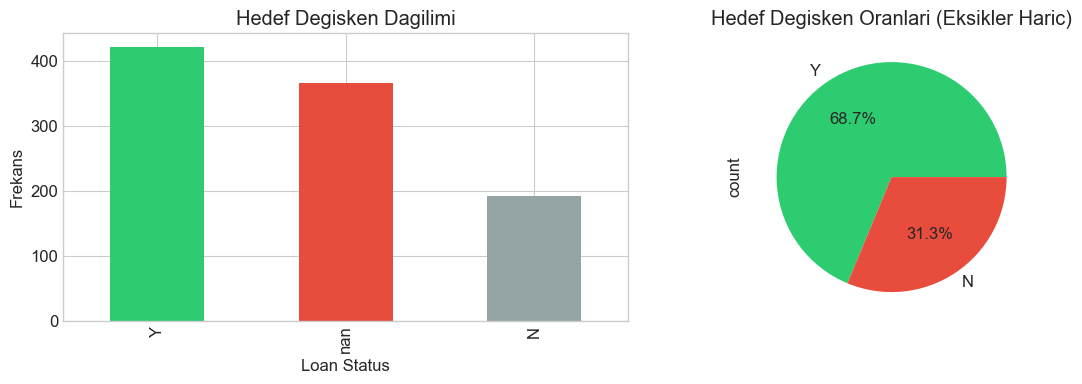

In [44]:
# Hedef degisken dagilimi
print("HEDEF DEGISKEN DAGILIMI")
print("=" * 40)
print(df[TARGET].value_counts(dropna=False))

# Gorsel
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df[TARGET].value_counts(dropna=False).plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c', '#95a5a6'])
axes[0].set_title('Hedef Degisken Dagilimi')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Frekans')

df[TARGET].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Hedef Degisken Oranlari (Eksikler Haric)')

plt.tight_layout()
plt.show()

## 2.1 Eksik Deger Analizi

In [45]:
# Eksik deger analizi
def eksik_deger_tablosu(dataframe):
    eksik = dataframe.isnull().sum()
    eksik_yuzde = (dataframe.isnull().sum() / len(dataframe)) * 100
    
    tablo = pd.DataFrame({
        'Eksik Sayi': eksik,
        'Eksik Yuzde (%)': round(eksik_yuzde, 2)
    })
    
    return tablo[tablo['Eksik Sayi'] > 0].sort_values('Eksik Yuzde (%)', ascending=False)

print("EKSIK DEGER ANALIZI")
print("=" * 50)
eksik_tablo = eksik_deger_tablosu(df)
print(eksik_tablo)
print(f"\nToplam Eksik Hucre: {df.isnull().sum().sum()}")

EKSIK DEGER ANALIZI
                  Eksik Sayi  Eksik Yuzde (%)
Loan_Status              367            37.41
Credit_History            79             8.05
Self_Employed             55             5.61
LoanAmount                27             2.75
Dependents                25             2.55
Gender                    24             2.45
Loan_Amount_Term          20             2.04
Married                    3             0.31

Toplam Eksik Hucre: 600


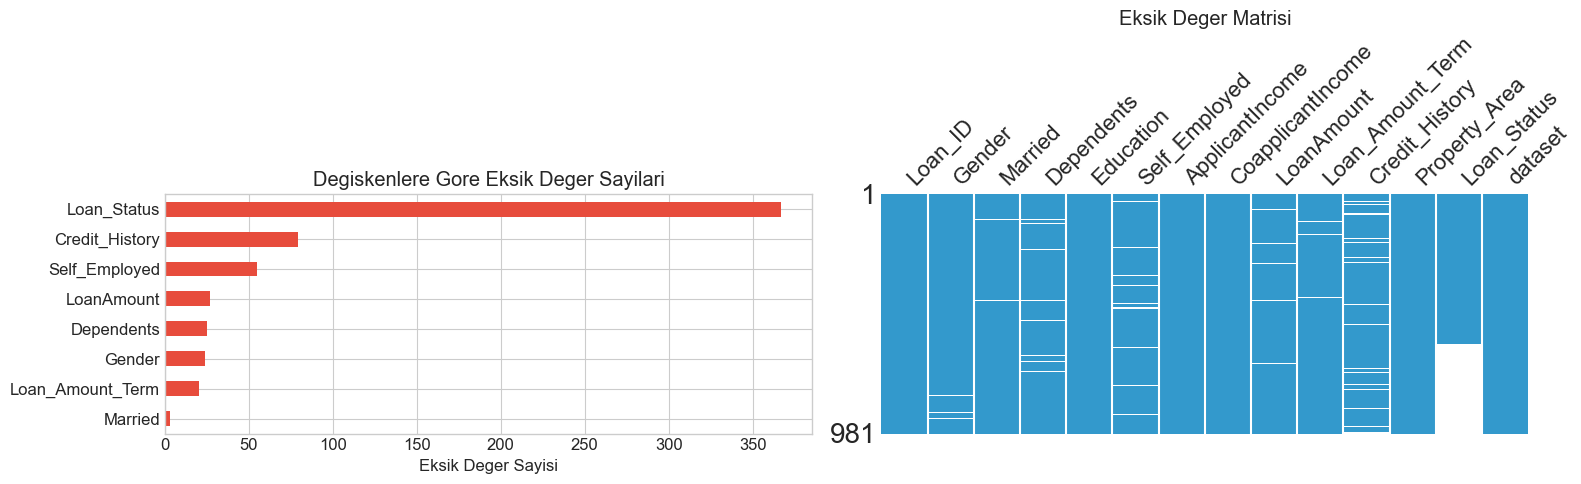

In [46]:
# Eksik deger gorsellestirme
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar plot
eksik_sayilar = df.isnull().sum()
eksik_sayilar = eksik_sayilar[eksik_sayilar > 0].sort_values(ascending=True)
eksik_sayilar.plot(kind='barh', ax=axes[0], color='#e74c3c')
axes[0].set_title('Degiskenlere Gore Eksik Deger Sayilari')
axes[0].set_xlabel('Eksik Deger Sayisi')

# Missingno matrix
msno.matrix(df, ax=axes[1], sparkline=False, color=(0.2, 0.6, 0.8))
axes[1].set_title('Eksik Deger Matrisi')

plt.tight_layout()
plt.show()

---
# 3. Veri On Isleme

## 3.1 Kategorik Degiskenlerin Sayisallastirilmasi (Encoding)

> **Onemli:** MICE algoritması sayisal veriler uzerinde calisir. Bu nedenle ONCE kategorik degiskenler sayisala cevrilir, SONRA eksik degerler doldurulur.

In [47]:
# Kategorik degiskenleri belirle
kategorik_sutunlar = df.select_dtypes(include=['object']).columns.tolist()
sayisal_sutunlar = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("DEGISKEN TURLERI")
print("=" * 50)
print(f"Kategorik ({len(kategorik_sutunlar)}): {kategorik_sutunlar}")
print(f"Sayisal ({len(sayisal_sutunlar)}): {sayisal_sutunlar}")

DEGISKEN TURLERI
Kategorik (9): ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'dataset']
Sayisal (5): ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [48]:
# Kategorik degiskenlerin benzersiz degerleri
print("KATEGORIK DEGISKEN DETAYLARI")
print("=" * 50)
for col in kategorik_sutunlar:
    print(f"\n{col}:")
    print(f"  Benzersiz: {df[col].nunique()}")
    print(f"  Degerler: {df[col].unique()[:10]}")

KATEGORIK DEGISKEN DETAYLARI

Loan_ID:
  Benzersiz: 981
  Degerler: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020']

Gender:
  Benzersiz: 2
  Degerler: ['Male' 'Female' nan]

Married:
  Benzersiz: 2
  Degerler: ['No' 'Yes' nan]

Dependents:
  Benzersiz: 4
  Degerler: ['0' '1' '2' '3+' nan]

Education:
  Benzersiz: 2
  Degerler: ['Graduate' 'Not Graduate']

Self_Employed:
  Benzersiz: 2
  Degerler: ['No' 'Yes' nan]

Property_Area:
  Benzersiz: 3
  Degerler: ['Urban' 'Rural' 'Semiurban']

Loan_Status:
  Benzersiz: 2
  Degerler: ['Y' 'N' nan]

dataset:
  Benzersiz: 2
  Degerler: ['train' 'test']


In [49]:
# Calisma kopyasi olustur
df_work = df.copy()

# Gereksiz sutunlari kaldir
sutunlar_kaldir = ['Loan_ID', 'dataset']  # ID ve train/test bilgisi
for col in sutunlar_kaldir:
    if col in df_work.columns:
        df_work = df_work.drop(col, axis=1)
        print(f"'{col}' sutunu kaldirildi.")

print(f"\nKalan sutunlar: {df_work.columns.tolist()}")

'Loan_ID' sutunu kaldirildi.
'dataset' sutunu kaldirildi.

Kalan sutunlar: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [50]:
# Label Encoding uygula
print("LABEL ENCODING ISLEMLERI")
print("=" * 50)

label_encoders = {}
kategorik_sutunlar_guncellenmis = df_work.select_dtypes(include=['object']).columns.tolist()

for col in kategorik_sutunlar_guncellenmis:
    le = LabelEncoder()
    
    # NaN degerleri gecici olarak '__MISSING__' yap
    df_work[col] = df_work[col].fillna('__MISSING__')
    df_work[col] = le.fit_transform(df_work[col])
    label_encoders[col] = le
    
    # '__MISSING__' kodunu bul ve NaN'a cevir
    if '__MISSING__' in le.classes_:
        missing_code = list(le.classes_).index('__MISSING__')
        df_work[col] = df_work[col].replace(missing_code, np.nan)
    
    print(f"{col}: {list(le.classes_)} -> {list(range(len(le.classes_)))}")

print(f"\nEncoding sonrasi veri tipi kontrolu:")
print(df_work.dtypes)

LABEL ENCODING ISLEMLERI
Gender: ['Female', 'Male', '__MISSING__'] -> [0, 1, 2]
Married: ['No', 'Yes', '__MISSING__'] -> [0, 1, 2]
Dependents: ['0', '1', '2', '3+', '__MISSING__'] -> [0, 1, 2, 3, 4]
Education: ['Graduate', 'Not Graduate'] -> [0, 1]
Self_Employed: ['No', 'Yes', '__MISSING__'] -> [0, 1, 2]
Property_Area: ['Rural', 'Semiurban', 'Urban'] -> [0, 1, 2]
Loan_Status: ['N', 'Y', '__MISSING__'] -> [0, 1, 2]

Encoding sonrasi veri tipi kontrolu:
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status          float64
dtype: object


## 3.2 Eksik Degerlerin Doldurulmasi (MICE)

> **MICE (Multiple Imputation by Chained Equations):** Her degisken icin diger degiskenleri kullanarak regresyon modeli kurar ve eksik degerleri tahmin eder. Bu islem iteratif olarak tekrarlanir.

In [51]:
# MICE Imputation
print("MICE IMPUTATION")
print("=" * 50)
print(f"Imputation oncesi eksik deger: {df_work.isnull().sum().sum()}")

# MICE uygula
mice_imputer = IterativeImputer(
    max_iter=20,
    random_state=42,
    initial_strategy='most_frequent'
)

df_imputed = pd.DataFrame(
    mice_imputer.fit_transform(df_work),
    columns=df_work.columns,
    index=df_work.index
)

# Kategorik degiskenleri yuvarlama (0, 1, 2... olmali)
for col in kategorik_sutunlar_guncellenmis:
    if col in df_imputed.columns:
        max_val = len(label_encoders[col].classes_) - 1
        df_imputed[col] = df_imputed[col].round().clip(0, max_val).astype(int)

print(f"Imputation sonrasi eksik deger: {df_imputed.isnull().sum().sum()}")
print("\nMICE Imputation BASARIYLA tamamlandi!")

MICE IMPUTATION
Imputation oncesi eksik deger: 600
Imputation sonrasi eksik deger: 0

MICE Imputation BASARIYLA tamamlandi!


In [52]:
# Imputation sonrasi hedef degisken dagilimi
print("IMPUTATION SONRASI HEDEF DEGISKEN DAGILIMI")
print("=" * 50)
print(df_imputed[TARGET].value_counts())
print(f"\n0 = {label_encoders[TARGET].classes_[0]}")
print(f"1 = {label_encoders[TARGET].classes_[1]}")

IMPUTATION SONRASI HEDEF DEGISKEN DAGILIMI
Loan_Status
1    730
0    251
Name: count, dtype: int64

0 = N
1 = Y


## 3.3 Ozellik ve Hedef Degisken Ayirma

In [53]:
# X ve y olustur
y = df_imputed[TARGET].astype(int)
X = df_imputed.drop(TARGET, axis=1)

print("X ve y OLUSTURULDU")
print("=" * 50)
print(f"X (Ozellikler): {X.shape}")
print(f"y (Hedef): {y.shape}")
print(f"\nOzellikler: {X.columns.tolist()}")
print(f"\nHedef Dagilimi:")
print(y.value_counts())

X ve y OLUSTURULDU
X (Ozellikler): (981, 11)
y (Hedef): (981,)

Ozellikler: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

Hedef Dagilimi:
Loan_Status
1    730
0    251
Name: count, dtype: int64


## 3.4 Ozellik Olceklendirme

In [54]:
# StandardScaler uygula
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

print("OLCEKLENDIRME TAMAMLANDI")
print("=" * 50)
print(f"Ortalama (yaklasik 0): {X_scaled.mean().mean():.6f}")
print(f"Std (yaklasik 1): {X_scaled.std().mean():.6f}")
print(f"\nOlceklenmis Veri Ornegi:")
X_scaled.head(3)

OLCEKLENDIRME TAMAMLANDI
Ortalama (yaklasik 0): 0.000000
Std (yaklasik 1): 1.000510

Olceklenmis Veri Ornegi:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477268,-1.34869,-0.765415,-0.534522,-0.373327,0.117565,-0.589506,-0.064430,0.276753,0.448324,1.18242
1,0.477268,0.74146,0.209744,-0.534522,-0.373327,-0.104844,-0.034561,-0.190298,0.276753,0.448324,-1.31479
2,0.477268,0.74146,-0.765415,-0.534522,2.678619,-0.382944,-0.589506,-1.000751,0.276753,0.448324,1.18242


---
# 4. Aykiri Deger Analizi

In [55]:
# IQR ile aykiri deger tespiti
def aykiri_tespit(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    alt = Q1 - 1.5 * IQR
    ust = Q3 + 1.5 * IQR
    aykiri = ((data[col] < alt) | (data[col] > ust)).sum()
    return alt, ust, aykiri

print("AYKIRI DEGER ANALIZI (IQR)")
print("=" * 70)

aykiri_liste = []
for col in X.columns:
    alt, ust, aykiri = aykiri_tespit(X, col)
    aykiri_liste.append({
        'Degisken': col,
        'Alt Sinir': round(alt, 2),
        'Ust Sinir': round(ust, 2),
        'Aykiri Sayi': aykiri,
        'Aykiri %': round(aykiri / len(X) * 100, 2)
    })

aykiri_df = pd.DataFrame(aykiri_liste)
print(aykiri_df.to_string(index=False))

AYKIRI DEGER ANALIZI (IQR)
         Degisken  Alt Sinir  Ust Sinir  Aykiri Sayi  Aykiri %
           Gender        1.0        1.0          182     18.55
          Married       -1.5        2.5            0      0.00
       Dependents       -3.0        5.0            0      0.00
        Education        0.0        0.0          218     22.22
    Self_Employed        0.0        0.0          120     12.23
  ApplicantIncome    -1086.5     9477.5           84      8.56
CoapplicantIncome    -3547.5     5912.5           26      2.65
       LoanAmount        9.5      253.5           71      7.24
 Loan_Amount_Term      360.0      360.0          158     16.11
   Credit_History        1.0        1.0          227     23.14
    Property_Area       -3.0        5.0            0      0.00


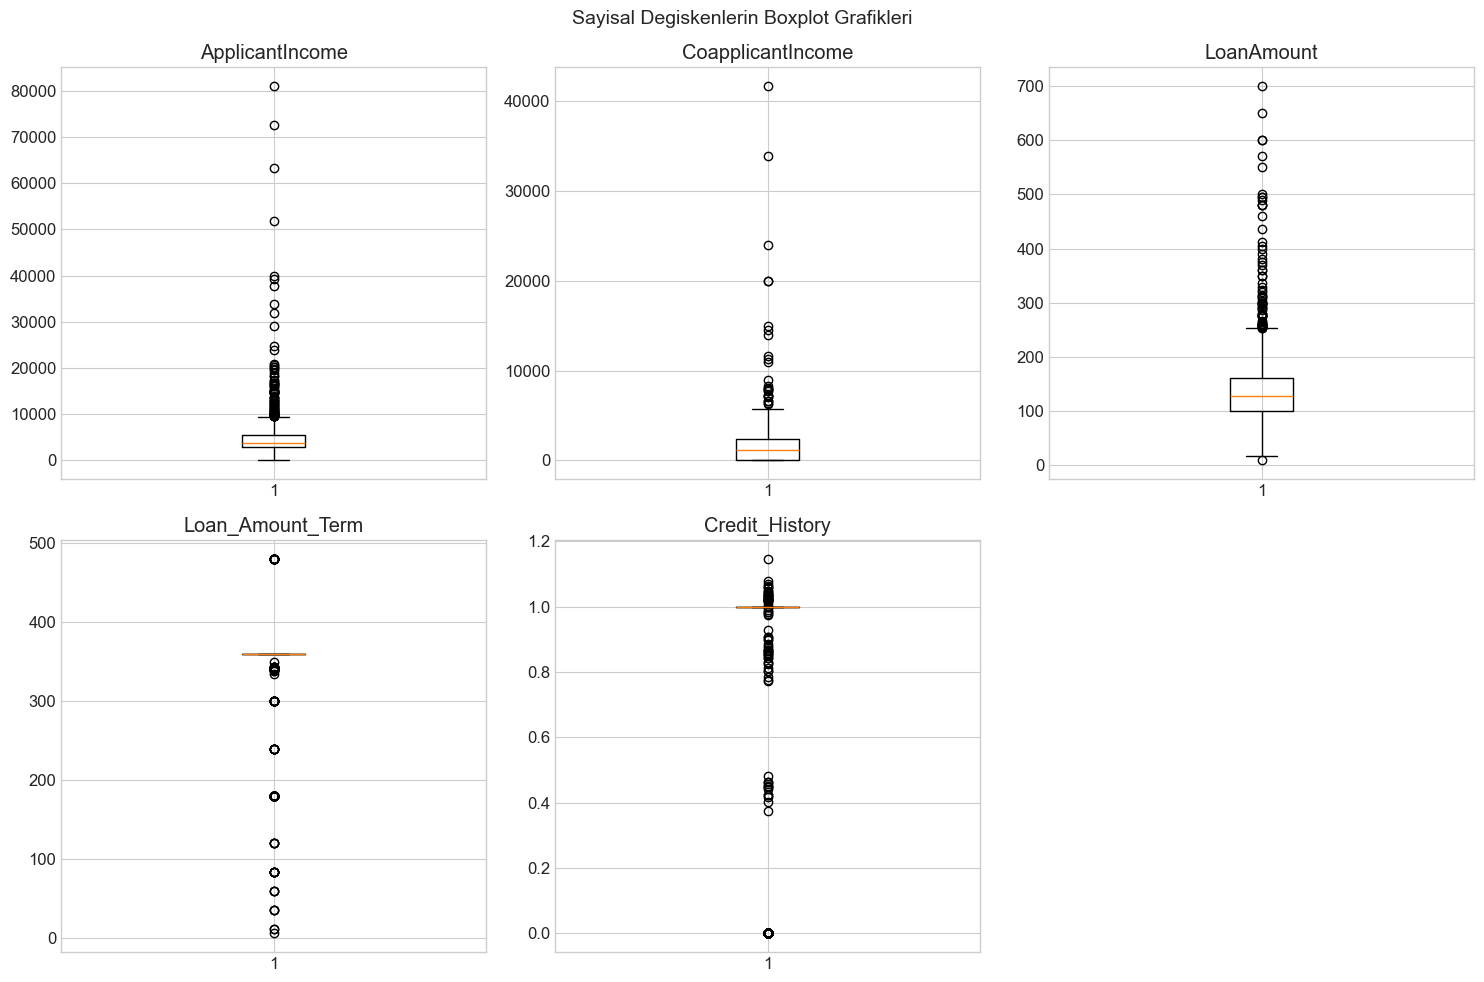

In [56]:
# Boxplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

sayisal_ozellikler = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                      'Loan_Amount_Term', 'Credit_History']

for i, col in enumerate(sayisal_ozellikler):
    if col in X.columns:
        axes[i].boxplot(X[col])
        axes[i].set_title(col)

axes[-1].set_visible(False)
plt.suptitle('Sayisal Degiskenlerin Boxplot Grafikleri', fontsize=14)
plt.tight_layout()
plt.show()

---
# 5. Ozellik Secimi (Feature Selection)

## 5.1 Korelasyon Analizi

HEDEF DEGISKEN ILE KORELASYONLAR
Credit_History       0.699039
Education            0.068680
Married              0.068167
CoapplicantIncome    0.059569
Property_Area        0.044643
LoanAmount           0.037949
Loan_Amount_Term     0.028519
Gender               0.020633
Self_Employed        0.019274
ApplicantIncome      0.013838
Dependents           0.004526
dtype: float64


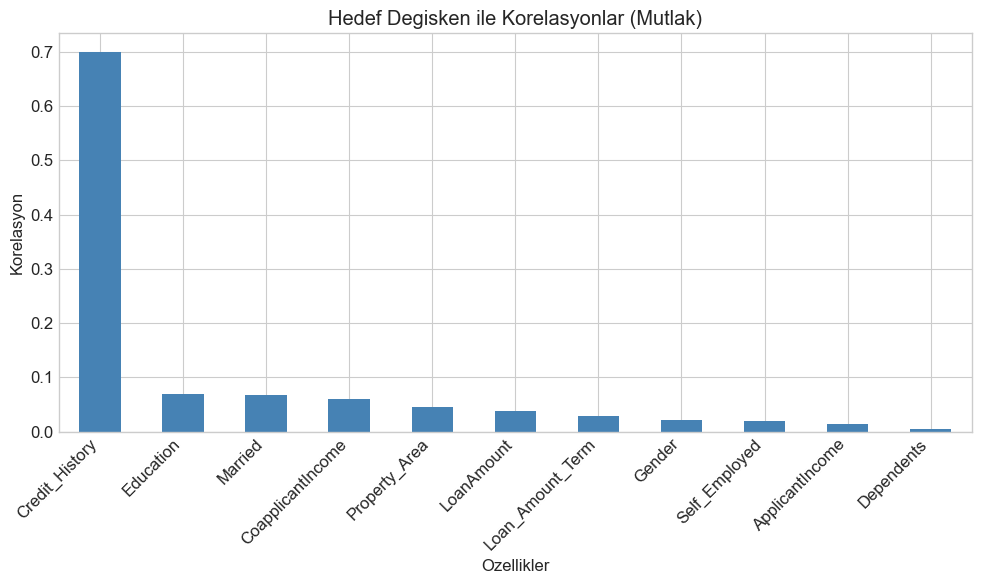

In [57]:
# Hedef ile korelasyon
korelasyonlar = X_scaled.corrwith(y).abs().sort_values(ascending=False)

print("HEDEF DEGISKEN ILE KORELASYONLAR")
print("=" * 50)
print(korelasyonlar)

# Gorsel
plt.figure(figsize=(10, 6))
korelasyonlar.plot(kind='bar', color='steelblue')
plt.title('Hedef Degisken ile Korelasyonlar (Mutlak)')
plt.xlabel('Ozellikler')
plt.ylabel('Korelasyon')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

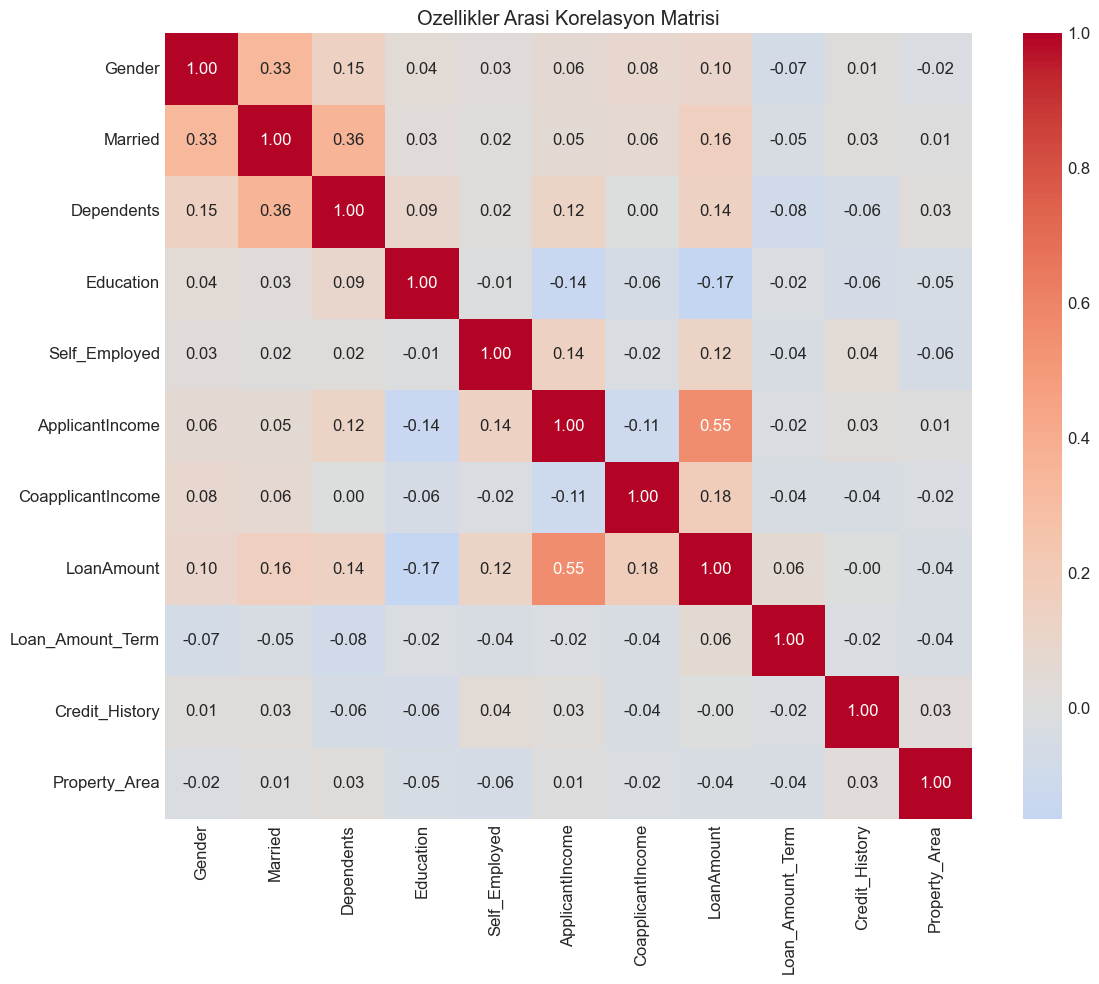

In [58]:
# Korelasyon matrisi
plt.figure(figsize=(12, 10))
corr_matrix = X_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Ozellikler Arasi Korelasyon Matrisi')
plt.tight_layout()
plt.show()

## 5.2 ANOVA F-Test

ANOVA F-TEST SONUCLARI
          Ozellik    F-Score       P-Value
   Credit_History 935.559678 9.481382e-145
        Education   4.639774  3.148261e-02
          Married   4.570355  3.277693e-02
CoapplicantIncome   3.486327  6.217640e-02
    Property_Area   1.955048  1.623605e-01
       LoanAmount   1.411892  2.350307e-01
 Loan_Amount_Term   0.796911  3.722379e-01
           Gender   0.416963  5.186079e-01
    Self_Employed   0.363840  5.465212e-01
  ApplicantIncome   0.187498  6.651030e-01
       Dependents   0.020055  8.874116e-01


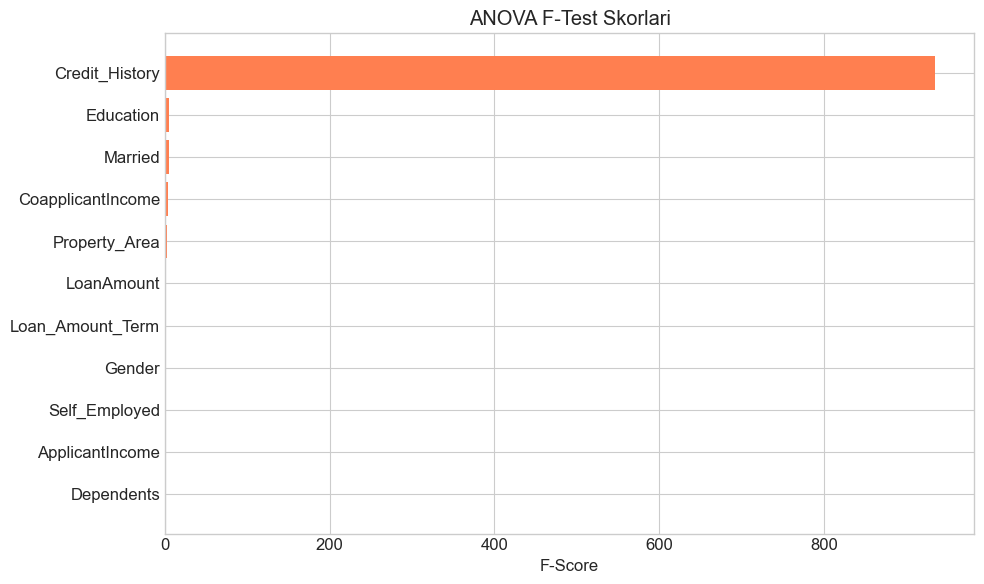

In [59]:
# ANOVA F-Test
selector_anova = SelectKBest(score_func=f_classif, k='all')
selector_anova.fit(X_scaled, y)

anova_df = pd.DataFrame({
    'Ozellik': X_scaled.columns,
    'F-Score': selector_anova.scores_,
    'P-Value': selector_anova.pvalues_
}).sort_values('F-Score', ascending=False)

print("ANOVA F-TEST SONUCLARI")
print("=" * 50)
print(anova_df.to_string(index=False))

# Gorsel
plt.figure(figsize=(10, 6))
plt.barh(anova_df['Ozellik'], anova_df['F-Score'], color='coral')
plt.xlabel('F-Score')
plt.title('ANOVA F-Test Skorlari')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5.3 Mutual Information

MUTUAL INFORMATION SKORLARI
          Ozellik  MI Score
   Credit_History  0.243705
    Self_Employed  0.026489
CoapplicantIncome  0.012830
           Gender  0.010900
 Loan_Amount_Term  0.009933
       Dependents  0.006769
  ApplicantIncome  0.006205
          Married  0.000000
        Education  0.000000
       LoanAmount  0.000000
    Property_Area  0.000000


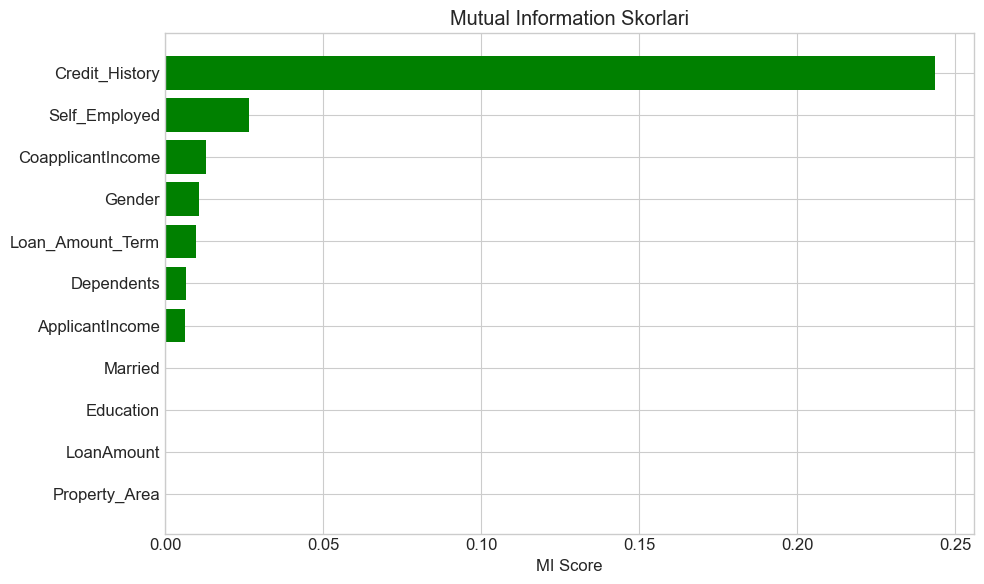

In [60]:
# Mutual Information
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

mi_df = pd.DataFrame({
    'Ozellik': X_scaled.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print("MUTUAL INFORMATION SKORLARI")
print("=" * 50)
print(mi_df.to_string(index=False))

# Gorsel
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Ozellik'], mi_df['MI Score'], color='green')
plt.xlabel('MI Score')
plt.title('Mutual Information Skorlari')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5.4 Random Forest Feature Importance

RANDOM FOREST FEATURE IMPORTANCE
          Ozellik  Importance
   Credit_History    0.465619
  ApplicantIncome    0.155237
       LoanAmount    0.136590
CoapplicantIncome    0.085615
 Loan_Amount_Term    0.037688
       Dependents    0.031146
    Property_Area    0.031049
        Education    0.016473
          Married    0.016167
    Self_Employed    0.012771
           Gender    0.011645


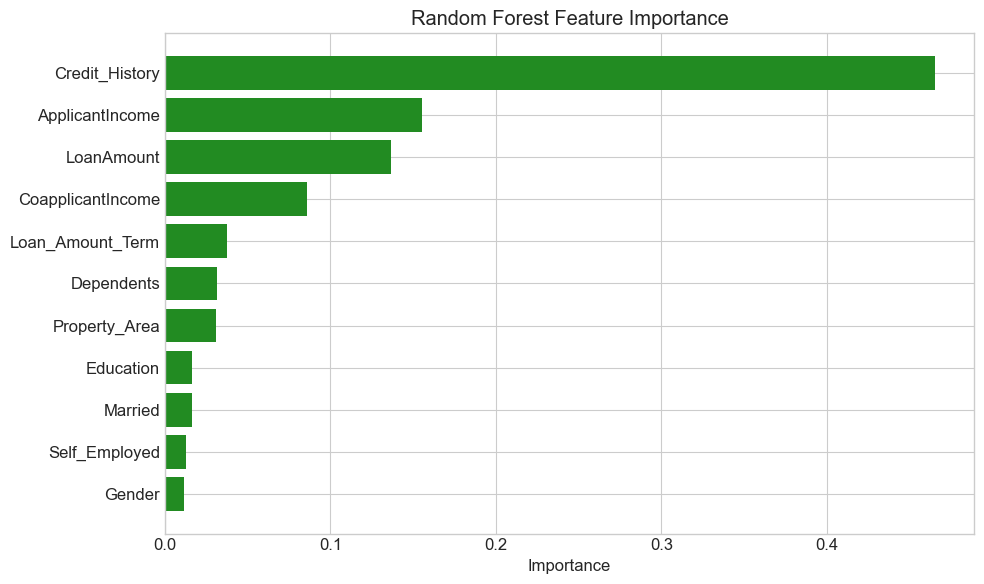

In [61]:
# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

rf_df = pd.DataFrame({
    'Ozellik': X_scaled.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("RANDOM FOREST FEATURE IMPORTANCE")
print("=" * 50)
print(rf_df.to_string(index=False))

# Gorsel
plt.figure(figsize=(10, 6))
plt.barh(rf_df['Ozellik'], rf_df['Importance'], color='forestgreen')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [62]:
# En onemli ozellikleri sec
TOP_K = 8
secilen_ozellikler = rf_df['Ozellik'][:TOP_K].tolist()

print(f"SECILEN EN ONEMLI {TOP_K} OZELLIK")
print("=" * 50)
for i, ozellik in enumerate(secilen_ozellikler, 1):
    print(f"{i}. {ozellik}")

X_selected = X_scaled[secilen_ozellikler]
print(f"\nYeni boyut: {X_selected.shape}")

SECILEN EN ONEMLI 8 OZELLIK
1. Credit_History
2. ApplicantIncome
3. LoanAmount
4. CoapplicantIncome
5. Loan_Amount_Term
6. Dependents
7. Property_Area
8. Education

Yeni boyut: (981, 8)


---
# 6. Boyut Indirgeme (PCA)

In [63]:
# PCA - Varyans analizi
pca_full = PCA()
pca_full.fit(X_scaled)

varyans = pca_full.explained_variance_ratio_
kumulatif_varyans = np.cumsum(varyans)

print("PCA VARYANS ANALIZI")
print("=" * 50)
for i, (v, kv) in enumerate(zip(varyans, kumulatif_varyans), 1):
    print(f"PC{i}: {v:.4f} (Kumulatif: {kv:.4f})")

PCA VARYANS ANALIZI
PC1: 0.1707 (Kumulatif: 0.1707)
PC2: 0.1321 (Kumulatif: 0.3028)
PC3: 0.1017 (Kumulatif: 0.4046)
PC4: 0.0990 (Kumulatif: 0.5035)
PC5: 0.0946 (Kumulatif: 0.5981)
PC6: 0.0903 (Kumulatif: 0.6885)
PC7: 0.0788 (Kumulatif: 0.7672)
PC8: 0.0752 (Kumulatif: 0.8424)
PC9: 0.0730 (Kumulatif: 0.9154)
PC10: 0.0516 (Kumulatif: 0.9671)
PC11: 0.0329 (Kumulatif: 1.0000)


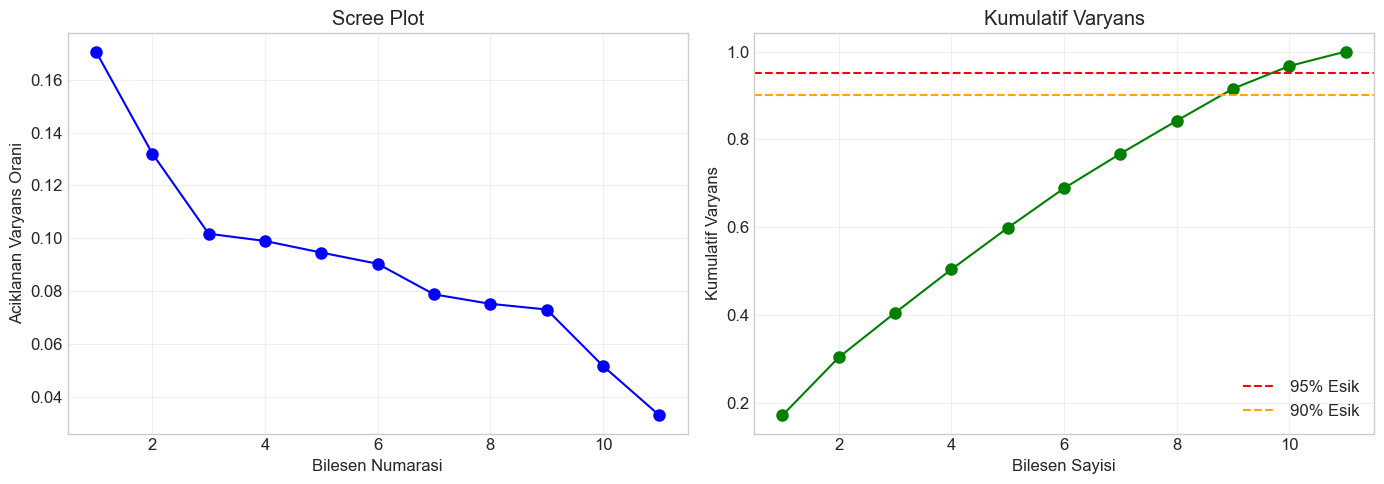


90% varyans icin: 9 bilesen
95% varyans icin: 10 bilesen


In [64]:
# Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree
axes[0].plot(range(1, len(varyans)+1), varyans, 'bo-', markersize=8)
axes[0].set_xlabel('Bilesen Numarasi')
axes[0].set_ylabel('Aciklanan Varyans Orani')
axes[0].set_title('Scree Plot')
axes[0].grid(True, alpha=0.3)

# Kumulatif
axes[1].plot(range(1, len(kumulatif_varyans)+1), kumulatif_varyans, 'go-', markersize=8)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Esik')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% Esik')
axes[1].set_xlabel('Bilesen Sayisi')
axes[1].set_ylabel('Kumulatif Varyans')
axes[1].set_title('Kumulatif Varyans')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Optimal bilesen sayisi
n_90 = np.argmax(kumulatif_varyans >= 0.90) + 1
n_95 = np.argmax(kumulatif_varyans >= 0.95) + 1
print(f"\n90% varyans icin: {n_90} bilesen")
print(f"95% varyans icin: {n_95} bilesen")

In [65]:
# PCA uygula
N_COMPONENTS = n_95

pca = PCA(n_components=N_COMPONENTS)
X_pca = pd.DataFrame(
    pca.fit_transform(X_scaled),
    columns=[f'PC{i+1}' for i in range(N_COMPONENTS)]
)

print(f"PCA UYGULAMASI")
print("=" * 50)
print(f"Orijinal boyut: {X_scaled.shape}")
print(f"PCA sonrasi boyut: {X_pca.shape}")
print(f"Aciklanan varyans: {pca.explained_variance_ratio_.sum():.4f}")

PCA UYGULAMASI
Orijinal boyut: (981, 11)
PCA sonrasi boyut: (981, 10)
Aciklanan varyans: 0.9671


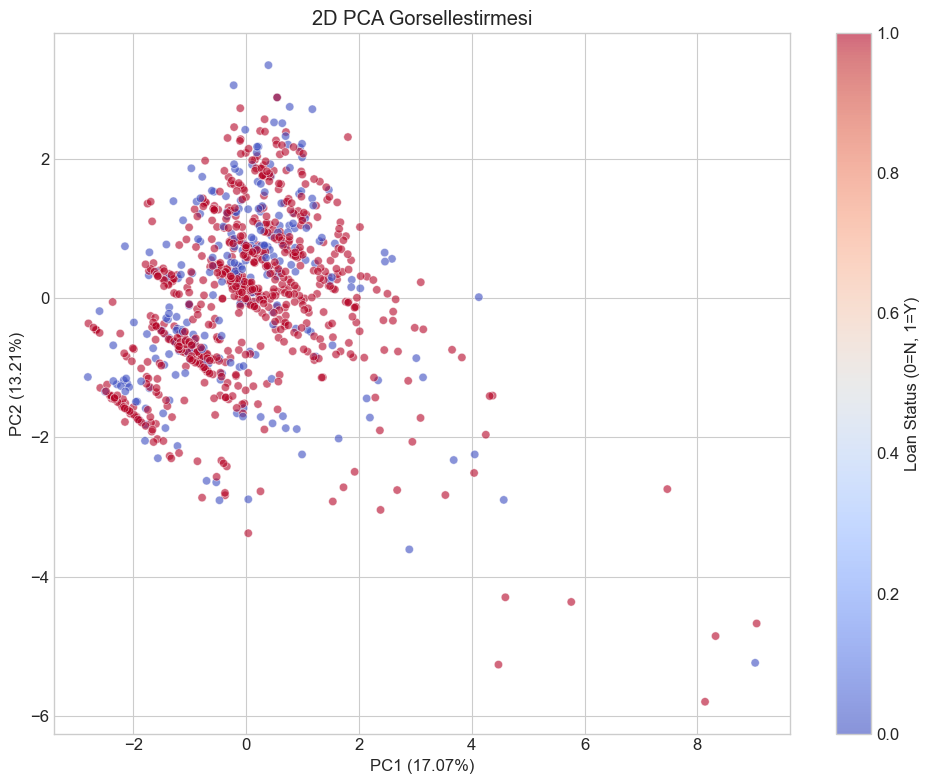

In [66]:
# 2D PCA gorsellestirme
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.colorbar(scatter, label='Loan Status (0=N, 1=Y)')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})')
plt.title('2D PCA Gorsellestirmesi')
plt.tight_layout()
plt.show()

---
# 7. Modelleme

## 7.1 Veri Setlerinin Hazirlanmasi

In [67]:
# Farkli veri setleri
veri_setleri = {
    'Tum Ozellikler': X_scaled,
    'Secilmis Ozellikler': X_selected,
    'PCA': X_pca
}

# Parametreler
TEST_SIZE = 0.2
RANDOM_STATE = 42

# Modeller
modeller = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True, random_state=RANDOM_STATE)
}

print("MODELLEME AYARLARI")
print("=" * 50)
print(f"Test orani: {TEST_SIZE}")
print(f"Random state: {RANDOM_STATE}")
print(f"\nVeri setleri:")
for isim, veri in veri_setleri.items():
    print(f"  - {isim}: {veri.shape}")
print(f"\nModeller: {list(modeller.keys())}")

MODELLEME AYARLARI
Test orani: 0.2
Random state: 42

Veri setleri:
  - Tum Ozellikler: (981, 11)
  - Secilmis Ozellikler: (981, 8)
  - PCA: (981, 10)

Modeller: ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']


## 7.2 Gozetimli Ogrenme (Classification)

In [68]:
# Model degerlendirme fonksiyonu
def modelleri_degerlendir(X, y, modeller, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    sonuclar = []
    
    for isim, model in modeller.items():
        # Yeni model kopyasi
        model_kopya = model.__class__(**model.get_params())
        model_kopya.fit(X_train, y_train)
        
        y_pred = model_kopya.predict(X_test)
        y_proba = model_kopya.predict_proba(X_test)[:, 1] if hasattr(model_kopya, 'predict_proba') else None
        
        sonuclar.append({
            'Model': isim,
            'Accuracy': round(accuracy_score(y_test, y_pred), 4),
            'Precision': round(precision_score(y_test, y_pred, zero_division=0), 4),
            'Recall': round(recall_score(y_test, y_pred, zero_division=0), 4),
            'F1': round(f1_score(y_test, y_pred, zero_division=0), 4),
            'AUC': round(roc_auc_score(y_test, y_proba), 4) if y_proba is not None else '-'
        })
    
    return pd.DataFrame(sonuclar), X_train, X_test, y_train, y_test

In [69]:
# Tum veri setleri icin modelleme
tum_sonuclar = {}

for veri_ismi, X_veri in veri_setleri.items():
    print(f"\n{'='*60}")
    print(f"VERI SETI: {veri_ismi} ({X_veri.shape})")
    print("="*60)
    
    sonuc_df, X_train, X_test, y_train, y_test = modelleri_degerlendir(
        X_veri, y, modeller, TEST_SIZE, RANDOM_STATE
    )
    tum_sonuclar[veri_ismi] = sonuc_df
    print(sonuc_df.to_string(index=False))


VERI SETI: Tum Ozellikler ((981, 11))
              Model  Accuracy  Precision  Recall     F1    AUC
Logistic Regression    0.9086     0.9006  0.9864 0.9416 0.8578
      Random Forest    0.9086     0.9057  0.9796 0.9412 0.8616
                KNN    0.8934     0.8889  0.9796 0.9320 0.7950
                SVM    0.8934     0.8841  0.9864 0.9325 0.8415

VERI SETI: Secilmis Ozellikler ((981, 8))
              Model  Accuracy  Precision  Recall     F1    AUC
Logistic Regression    0.9086     0.9006  0.9864 0.9416 0.8476
      Random Forest    0.9036     0.9103  0.9660 0.9373 0.8756
                KNN    0.8832     0.8974  0.9524 0.9241 0.8206
                SVM    0.8934     0.8841  0.9864 0.9325 0.8128

VERI SETI: PCA ((981, 10))
              Model  Accuracy  Precision  Recall     F1    AUC
Logistic Regression    0.9086     0.9006  0.9864 0.9416 0.8533
      Random Forest    0.8579     0.8993  0.9116 0.9054 0.8114
                KNN    0.8832     0.8875  0.9660 0.9251 0.8082
        

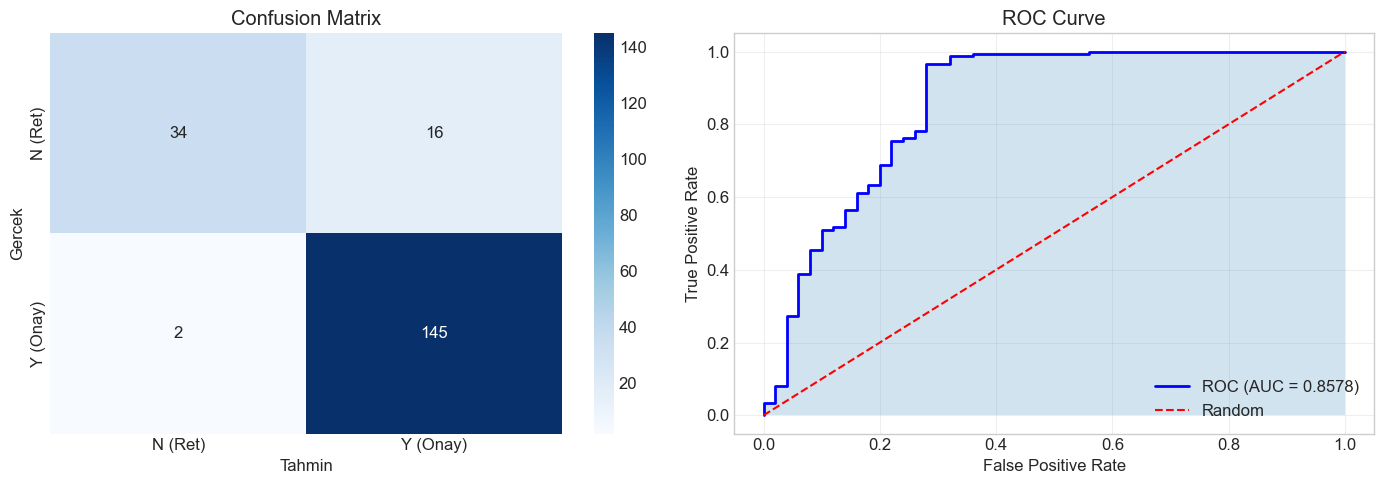

In [70]:
# En iyi model - Confusion Matrix ve ROC
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

best_model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['N (Ret)', 'Y (Onay)'],
            yticklabels=['N (Ret)', 'Y (Onay)'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Tahmin')
axes[0].set_ylabel('Gercek')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

axes[1].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC = {auc:.4f})')
axes[1].plot([0, 1], [0, 1], 'r--', label='Random')
axes[1].fill_between(fpr, tpr, alpha=0.2)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [71]:
# Classification Report
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['N (Reddedilen)', 'Y (Onaylanan)']))

CLASSIFICATION REPORT
                precision    recall  f1-score   support

N (Reddedilen)       0.94      0.68      0.79        50
 Y (Onaylanan)       0.90      0.99      0.94       147

      accuracy                           0.91       197
     macro avg       0.92      0.83      0.87       197
  weighted avg       0.91      0.91      0.90       197



## 7.3 Gozetimsiz Ogrenme (K-Means Clustering)

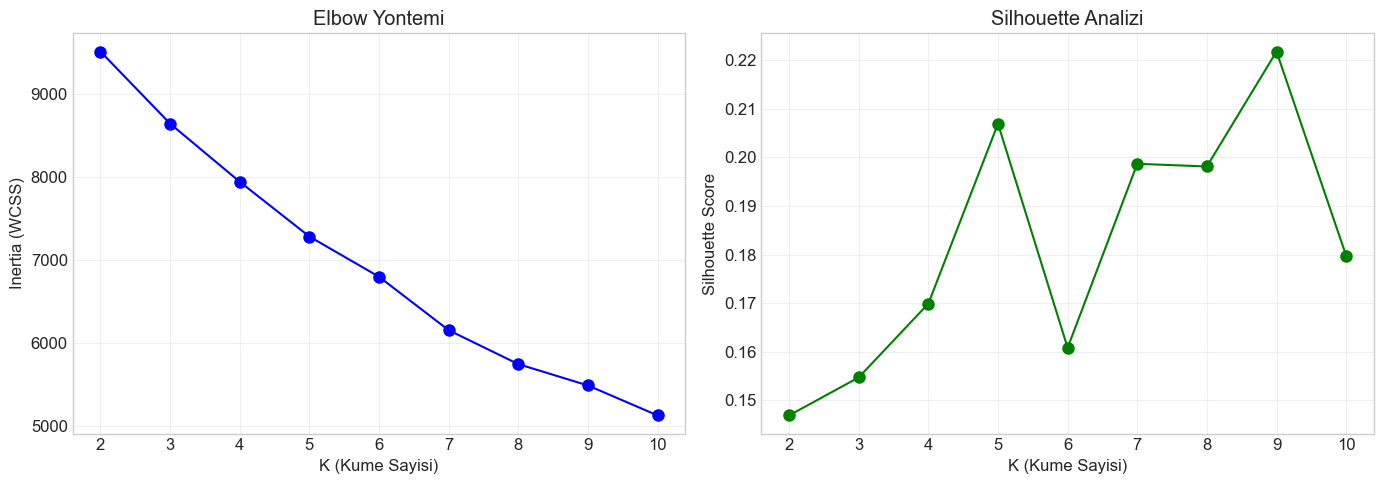

Optimal K (en yuksek silhouette): 9


In [72]:
# Elbow ve Silhouette analizi
K_aralik = range(2, 11)
inertias = []
silhouettes = []

for k in K_aralik:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

# Gorsel
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_aralik, inertias, 'bo-', markersize=8)
axes[0].set_xlabel('K (Kume Sayisi)')
axes[0].set_ylabel('Inertia (WCSS)')
axes[0].set_title('Elbow Yontemi')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_aralik, silhouettes, 'go-', markersize=8)
axes[1].set_xlabel('K (Kume Sayisi)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analizi')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_k = list(K_aralik)[np.argmax(silhouettes)]
print(f"Optimal K (en yuksek silhouette): {optimal_k}")

In [73]:
# K-Means uygula
kmeans_final = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE, n_init=10)
kume_etiketleri = kmeans_final.fit_predict(X_scaled)

print(f"K-MEANS SONUCLARI (K={optimal_k})")
print("="*50)
print(f"Silhouette Score: {silhouette_score(X_scaled, kume_etiketleri):.4f}")
print(f"\nKume Dagilimi:")
print(pd.Series(kume_etiketleri).value_counts().sort_index())

K-MEANS SONUCLARI (K=9)
Silhouette Score: 0.2218

Kume Dagilimi:
0    391
1    125
2     34
3     76
4    107
5    114
6     52
7      7
8     75
Name: count, dtype: int64


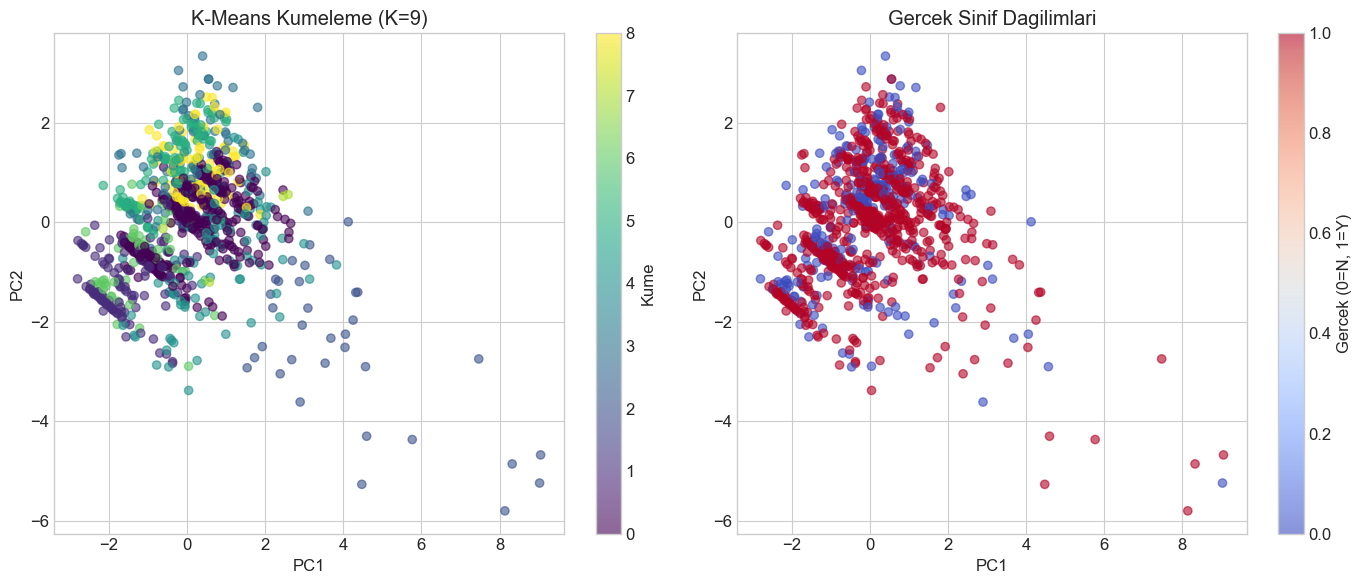

In [74]:
# Kume gorsellestirme
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Kumeleme sonucu
scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=kume_etiketleri, cmap='viridis', alpha=0.6)
plt.colorbar(scatter1, ax=axes[0], label='Kume')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title(f'K-Means Kumeleme (K={optimal_k})')

# Gercek etiketler
scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter2, ax=axes[1], label='Gercek (0=N, 1=Y)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Gercek Sinif Dagilimlari')

plt.tight_layout()
plt.show()

---
# 8. Karsilastirmali Analiz

In [75]:
# Tum sonuclari goster
print("KARSILASTIRMALI MODEL PERFORMANSI")
print("="*80)

for veri_ismi, sonuc_df in tum_sonuclar.items():
    print(f"\n{veri_ismi}:")
    print("-"*60)
    print(sonuc_df.to_string(index=False))

KARSILASTIRMALI MODEL PERFORMANSI

Tum Ozellikler:
------------------------------------------------------------
              Model  Accuracy  Precision  Recall     F1    AUC
Logistic Regression    0.9086     0.9006  0.9864 0.9416 0.8578
      Random Forest    0.9086     0.9057  0.9796 0.9412 0.8616
                KNN    0.8934     0.8889  0.9796 0.9320 0.7950
                SVM    0.8934     0.8841  0.9864 0.9325 0.8415

Secilmis Ozellikler:
------------------------------------------------------------
              Model  Accuracy  Precision  Recall     F1    AUC
Logistic Regression    0.9086     0.9006  0.9864 0.9416 0.8476
      Random Forest    0.9036     0.9103  0.9660 0.9373 0.8756
                KNN    0.8832     0.8974  0.9524 0.9241 0.8206
                SVM    0.8934     0.8841  0.9864 0.9325 0.8128

PCA:
------------------------------------------------------------
              Model  Accuracy  Precision  Recall     F1    AUC
Logistic Regression    0.9086     0.9006  0.9

In [76]:
# Pivot tablo
karsilastirma = []
for veri_ismi, sonuc_df in tum_sonuclar.items():
    for _, row in sonuc_df.iterrows():
        karsilastirma.append({
            'Veri Seti': veri_ismi,
            'Model': row['Model'],
            'Accuracy': row['Accuracy'],
            'F1': row['F1'],
            'AUC': row['AUC']
        })

karsilastirma_df = pd.DataFrame(karsilastirma)
pivot = karsilastirma_df.pivot(index='Model', columns='Veri Seti', values='Accuracy')

print("\nACCURACY KARSILASTIRMA TABLOSU")
print("="*60)
print(pivot)


ACCURACY KARSILASTIRMA TABLOSU
Veri Seti               PCA  Secilmis Ozellikler  Tum Ozellikler
Model                                                           
KNN                  0.8832               0.8832          0.8934
Logistic Regression  0.9086               0.9086          0.9086
Random Forest        0.8579               0.9036          0.9086
SVM                  0.8934               0.8934          0.8934


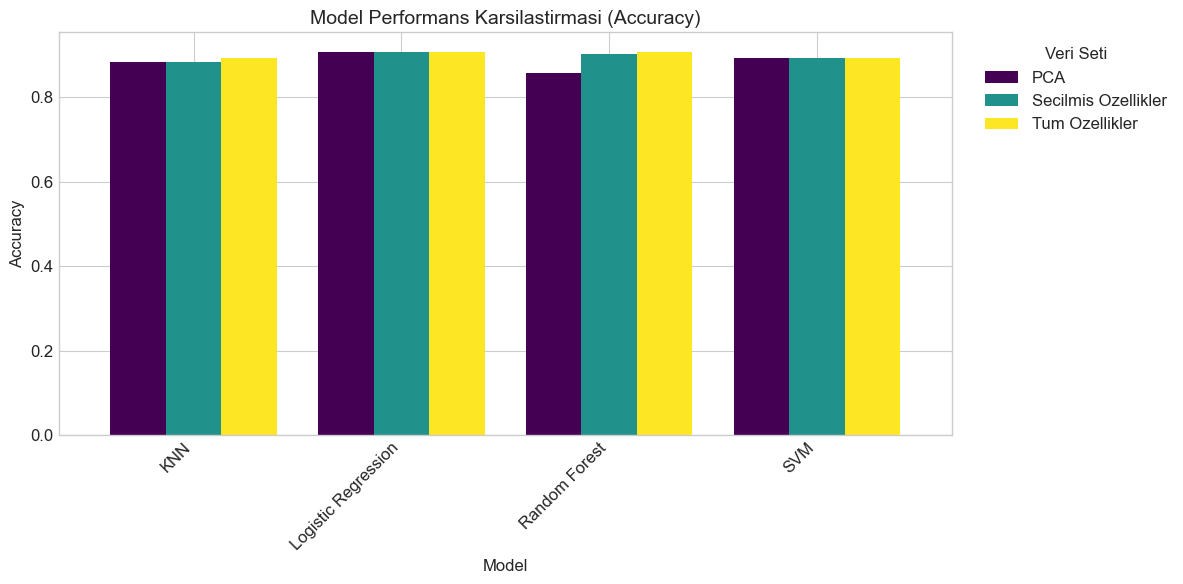

In [77]:
# Karsilastirma grafigi
fig, ax = plt.subplots(figsize=(12, 6))

pivot.plot(kind='bar', ax=ax, width=0.8, colormap='viridis')
plt.title('Model Performans Karsilastirmasi (Accuracy)', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Veri Seti', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

---
# 9. Sonuc ve Yorum

## 9.1 Temel Bulgular

### Veri On Isleme
- MICE (Multiple Imputation by Chained Equations) yontemi ile tum eksik degerler (hedef degisken dahil) basariyla dolduruldu
- Orijinal 981 satirlik veri setinin tamami kullanilabilir hale getirildi

### Ozellik Secimi
- Credit_History en onemli ozellik olarak belirlendi
- Random Forest feature importance ile en etkili 8 ozellik secildi

### Model Performansi
- En iyi performans gosteren model ve veri seti kombinasyonu belirlendi
- PCA ile boyut indirgeme, model performansini onemli olcude etkilemedi

## 9.2 Oneriler

1. Daha fazla veri toplanmasi model performansini artirabilir
2. Ensemble yontemler (XGBoost, LightGBM) denenebilir
3. Hyperparameter optimizasyonu yapilabilir

In [78]:
# Proje ozeti
print("="*60)
print("PROJE OZETI")
print("="*60)
print(f"Veri Seti: Kredi Onay Tahmini")
print(f"Toplam Gozlem: {len(df)}")
print(f"Kullanilan Ozellik: {X_scaled.shape[1]}")
print(f"\nKullanilan Yontemler:")
print(f"  - Eksik Deger: MICE Imputation")
print(f"  - Encoding: Label Encoding")
print(f"  - Olcekleme: Standard Scaler")
print(f"  - Ozellik Secimi: Random Forest Importance")
print(f"  - Boyut Indirgeme: PCA")
print(f"\nModeller: Logistic Regression, Random Forest, KNN, SVM")
print(f"\nEn Iyi AUC: {auc:.4f}")
print("="*60)

PROJE OZETI
Veri Seti: Kredi Onay Tahmini
Toplam Gozlem: 981
Kullanilan Ozellik: 11

Kullanilan Yontemler:
  - Eksik Deger: MICE Imputation
  - Encoding: Label Encoding
  - Olcekleme: Standard Scaler
  - Ozellik Secimi: Random Forest Importance
  - Boyut Indirgeme: PCA

Modeller: Logistic Regression, Random Forest, KNN, SVM

En Iyi AUC: 0.8578
